영화 리뷰 분류: 이진 분류 예제 IBDM(Internet Movie DataBase)

  - 실제 데이터에 대한 상세 기술 : 
      "imdb": ['negative', 'positive']
  
  - 예측하고자 하는 방법/방향 기술 :
      리뷰 텍스트를 기반으로 긍정(1)과 부정(0)을 분류
      
  - 학습을 위해 데이터가 어떻게 가공/처리 되었는지 기술 : 
      num_words=10000 매개변수를 주어 가장 자주 나타나는 단어 1만 개만 사용하도록 제한한다.
      신경망에 숫자리스트를 주입할 수는 없기 때문에, 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환한다.
      
  - 사용된 모델의 입력층과 출력층에 대한 기술 :
      은닉 유닛의 개수가 16인 층을 2개 사용, 은닉유닛이 16개라는 것은 가중치 행렬의 크기가 16이라는것이다.
      중간에 있는 은닉층은 활성화 함수로 relu를 사용, 마지막 층은 확률을 출력하기 위해 sigmoid 함수를 사용하였다.
      출력의 범위는 0~1로 1에 가까울수록 긍정적인 리뷰일 가능성이 높다는 것을 의미한다.   

In [1]:
# 3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb
import numpy as np

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np.load = np_load_old

Using TensorFlow backend.


In [2]:
# 3-2 정수 시퀀스를 이진 행렬로 인코딩하기
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
# 3-3 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0730 02:21:59.188342  5988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 02:21:59.203605  5988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 02:21:59.232075  5988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
# 3-4 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0730 02:21:59.304583  5988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 02:21:59.323710  5988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0730 02:21:59.337522  5988 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# 3-5 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3-6 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [5]:
# 3-7 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
# 3-8 모델 훈련하기
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0730 02:21:59.729162  5988 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 486us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 4s 277us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 267us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3086 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 4s 256us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3163 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

In [7]:
# 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

Text(0.5, 0, 'Epochs')

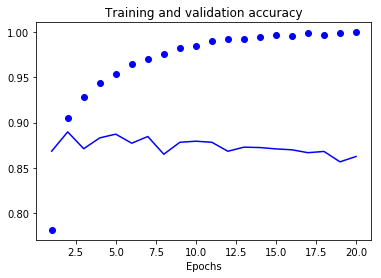

In [8]:
# 3-10 훈련과 검증 정확도 그리기
plt.clf() #그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')

In [10]:
# 3-11 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 5s 186us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 4s 159us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 4s 167us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 5s 219us/step


[0.29884448519706724, 0.88256]